<a href="https://colab.research.google.com/github/NatalijaGajic/pppo_classification/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
from IPython.display import clear_output
def clear():
  for i in range(10):
    clear_output(wait=True)
    print()

from IPython.display import Image, display

## Sadr≈æaj

1. Uvod
2. Terminologija
3. Opis podataka
4. Metodologija treniranja
5. Obuƒçavanje klasifikacionih modela
5. Zakljuƒçak
6. Literatura



###**Uvod**

Klasifikacija fotografija predstavlja nadgledani zadatak ma≈°inskog uƒçenja dodeljivanja (najverovatnije) oznake ulaznoj fotografiji iz fiksnog skupa oznaka (kategorija). Odnosi se na postupak dodeljivanja oznake (odnosno klase) fotografiji na osnovu njenog vizuelnog sadr≈æaja.

Postoje ƒçetiri osnovne vrste klasifikacije:


*   **Binary classification**- zadaci klasifikacije u kojima postoje dve moguƒáe klase
*   **Multi-class classification** - zadaci klasifikacije u kojima postoji vi≈°e moguƒáih klasa od kojih se jedna dodeljuje instanci
*   **Multi-label classification** - zadaci klasifikacije u kojima postoji dve ili vi≈°e klasa od kojih jedna ili vi≈°e njih mogu da budu dodeljeni instanci
*   **Imbalanced classificaton** - odnosi se na klasifikacione zadatke nad setom podataka u kom je broj instanci razliƒçitih klasa neravnomerno rasporeƒëen

Zadatak predstavlja klasifikacija biljaka na osnovu slike njenog lista. Svaka instanca pripada jednoj od 99 moguƒáih klasa, pa je u pitanju multi-class klasifikacija. 

Prethodna istra≈æivanja dovela su do razvoja razliƒçitih metoda analize listova.  Botaniƒçari koriste razliƒçite karakteristike listova u morfolo≈°kim i taksonomskim istra≈æivanjima. 
Generalno se smatra da je najkorisnije karakteristike za prepoznavanje biljaka dvodimenzionalni oblik obrisa njihovih listova ili latica, kao i mre≈æa vena lista i karakteristike margina lista. Automatski sistemi za klasifikaciju biljaka samim tim koriste tehnike obrade slike koje se baziraju na ovim karakteristikama. 
Istra≈æivaƒçi u ovoj oblasti smatraju da obris oblika lista najefektivnije omoguƒáava prepoznavanje biljke, buduƒái da veƒáina biljaka ima karakteristiƒçan oblik lista [1].







###**Terminologija** 

*Taksonomija* - nauka koja prouƒçava principe, metode i svrhe klasifikacije. U biologiji se odnosi na ureƒëenu i hijerarhijsku klasifikaciju ≈æivih biƒáa.

*Margina* - graniƒçna povr≈°ina lista listova. Margine mogu biti glatke, zglobljene (nazubljene), lobanje ili razdvojene.

*Vene* - vaskularni tkivni paketi koji podr≈æavaju list i transportne hranljive materije.

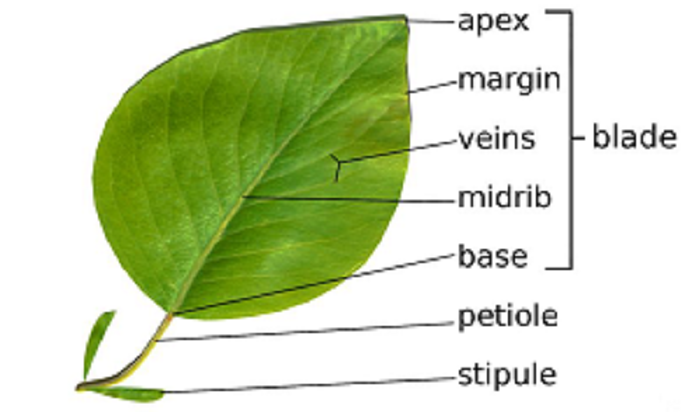

In [64]:
display(Image('slike/list_terminologija.png'))

###**Opis podataka**

Set podataka sadr≈æi 1584 slika biljaka (16 za svaku od 99 klasa (vrste biljaka)). Ove slike su binarne, sa belom pozadinom i crnim listom, razliƒçite rezolucije. Svaka od slika dodatno je obja≈°njena skupom feature-a [2]:


*  deskriptor oblika,
*  histogram teksure i
*  histogram margine.

Za svaki od ovih feature-a dat je vektor od 64 atributa za svaki od primeraka u skupu podataka.







Preuzimanje dataset-a i csv fajlova:

In [19]:
#https://drive.google.com/file/d/1Iaq6NNiR8CH4jruMs4wQoh-ZV5Nndm1f/view?usp=sharing
#https://drive.google.com/file/d/1q7Fy4SVLLODGQxzpZa3ZMOr0kBgKSRRh/view?usp=sharing
#https://drive.google.com/file/d/1ZyQ7jkw91kLyI8gnm_I9Cnlrm1qlQJPI/view?usp=sharing
#https://drive.google.com/file/d/1Egb1USY9s04hShkSHxTsRdtrFRTJK29f/view?usp=sharing
!gdown --id "1Iaq6NNiR8CH4jruMs4wQoh-ZV5Nndm1f"
!gdown --id "1q7Fy4SVLLODGQxzpZa3ZMOr0kBgKSRRh"
!gdown --id "1ZyQ7jkw91kLyI8gnm_I9Cnlrm1qlQJPI"
!gdown --id "1Egb1USY9s04hShkSHxTsRdtrFRTJK29f"
!unzip slike.zip
!unzip images.zip
clear()

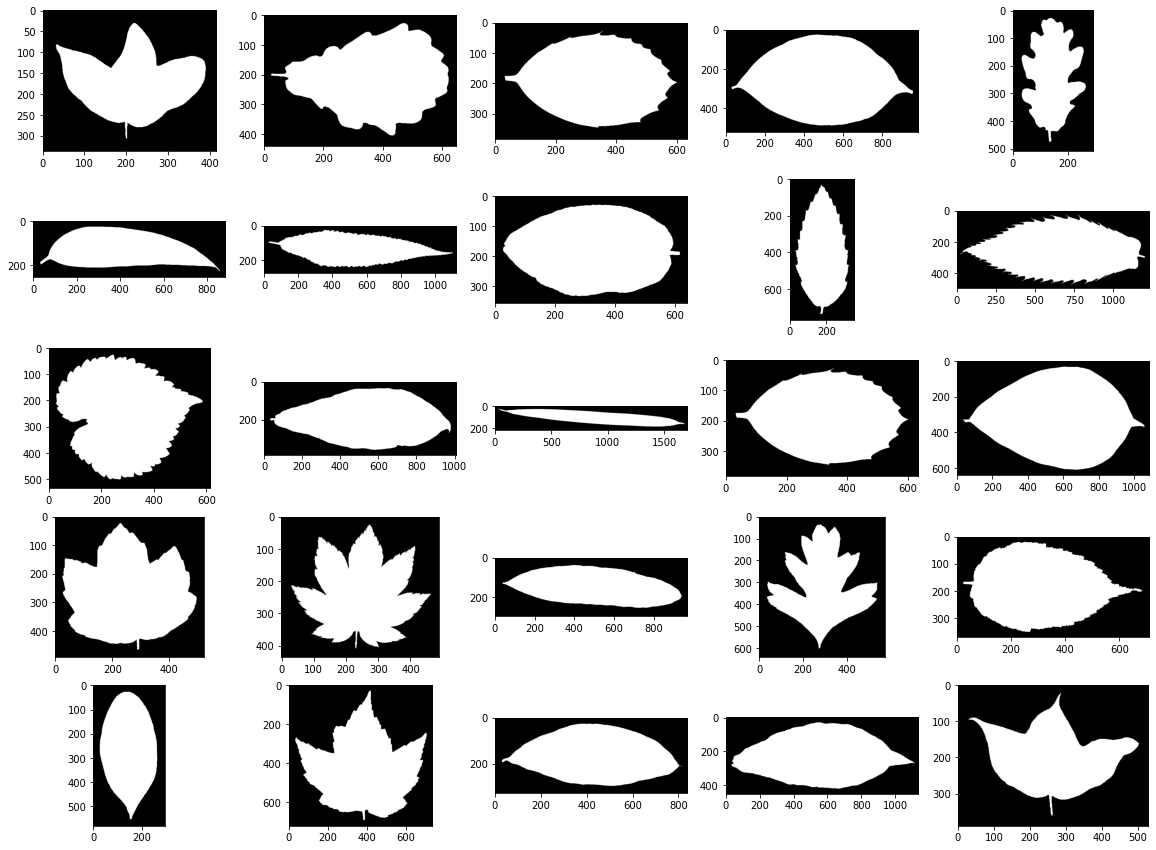

In [20]:
import matplotlib.pyplot as plt
from random import randrange
plt.figure(figsize=(20,15))
from keras.preprocessing.image import load_img
for i in range(25):
    image_number=randrange(1584)
    plt.subplot(5,5,i+1)
    img=load_img("/content/images/" + str(image_number)+'.jpg')
    plt.imshow(img)

Fajl train.csv sadr≈æi 990 zapisa labeliranih slika koje ƒáe se koristiti za treniranje klasifikacionog modela.

Polja fajla:

id - jedinstveni identifikator slike

species - ime klase (vrste biljke) kojoj pripada instanca reprezentovana unosom sa odgovarajuƒáim id-em

margin_1, margin_2, margin_3, ..., margin_64 - svaki od 64 atributa vektora za feature margine
shape_1, shape_2, shape_3, ..., shape_64 - svaki od 64 atributa vektora za feature oblika lista

texture_1, texture_2, texture_3, ..., texture_64 - svaki od 64 atributa vektora za feature teksture 

In [21]:
import pandas as pd
df_train = pd.read_csv('/content/train.csv', index_col=False)
df_test = pd.read_csv('/content/test.csv', index_col=False)
print(df_test.head())
print(df_test.describe())

   id   margin1   margin2   margin3  ...  texture61  texture62  texture63  texture64
0   4  0.019531  0.009766  0.078125  ...        0.0   0.000000   0.003906   0.053711
1   7  0.007812  0.005859  0.064453  ...        0.0   0.000977   0.037109   0.044922
2   9  0.000000  0.000000  0.001953  ...        0.0   0.015625   0.000000   0.000000
3  12  0.000000  0.000000  0.009766  ...        0.0   0.089844   0.000000   0.008789
4  13  0.001953  0.000000  0.015625  ...        0.0   0.007812   0.009766   0.007812

[5 rows x 193 columns]
                id     margin1     margin2  ...   texture62   texture63   texture64
count   594.000000  594.000000  594.000000  ...  594.000000  594.000000  594.000000
mean    780.673401    0.017562    0.028425  ...    0.019975    0.009389    0.020970
std     465.646977    0.019585    0.038351  ...    0.034704    0.013457    0.023407
min       4.000000    0.000000    0.000000  ...    0.000000    0.000000    0.000000
25%     368.500000    0.001953    0.001953  ..

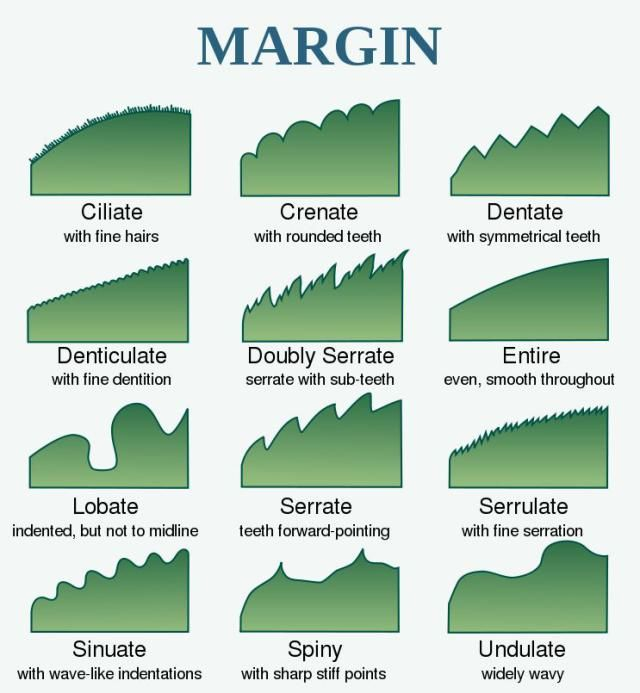

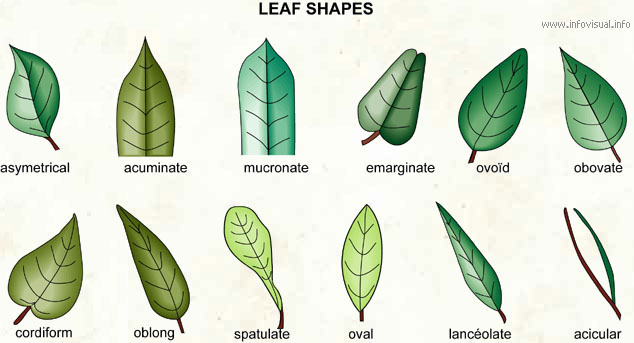

In [63]:
display(Image('slike/margin.jpg'))
display(Image('slike/shape.jpg'))

In [22]:
print(df_train["species"].value_counts())
print(df_train.isnull().sum())

Alnus_Maximowiczii        10
Populus_Nigra             10
Quercus_Phillyraeoides    10
Quercus_Chrysolepis       10
Quercus_Ilex              10
                          ..
Phildelphus               10
Sorbus_Aria               10
Prunus_Avium              10
Cornus_Controversa        10
Tilia_Tomentosa           10
Name: species, Length: 99, dtype: int64
id           0
species      0
margin1      0
margin2      0
margin3      0
            ..
texture60    0
texture61    0
texture62    0
texture63    0
texture64    0
Length: 194, dtype: int64


####**Moguƒái pristupi**

Za treniranje modela mogu se koristiti ekstraktovani feature-i, slike ili kombinacija ovih podataka.

Pored veƒá ekstraktovanih feature-a, mogu se ekstraktovati dodatni feature-i, koji mogu ruƒçno biti ekstraktovani ili uz pomoƒá postojeƒáih definisanih algoritama, pri ƒçemu treba razmatrati algoritme koje ima smisla primenjivati na binarnim slikama:


*   HuMoments - kvantifikuju oblik objekta na slici,
*   Odnos crnih i belih piksela,
*   Rezolucija slike,
*   Odnos ≈°irine i visine,
*   Da li je orijentacija horizontalna (≈°irina > visina).

Ulazni podaci modela mogu biti i same slike. U sluƒçaju klasifikacije koja kao ulazne podatke prima slike koriste se modeli dubokog uƒçenja, taƒçnije konvolucione neuronske mre≈æe. Konvolucione neuronske mre≈æe u svojoj arhitekturi sadr≈æe konvolucione slojeve koji se pona≈°aju kao feature ekstraktori. Neuronske mre≈æe koje poseduju u svojoj arhitekturi fully connected slojeve zahtevaju fiksnu veliƒçinu slike, pa buduƒái da su slike iz dataset-a varijabilne veliƒçine, rad sa ovim arhitekturama bi podrazumevao tehnike pretprocesuiranja slika kojim se slike pode≈°avaju na fiksnu rezoluciju koja odgovara onoj koju model oƒçekuje na ulazu. Drugi pristup bi predstavljao kori≈°ƒáenje fully convolutional arhitektura, koje dozvoljavaju varijabilnu veliƒçinu slike na ulazu.

U sluƒçaju modela dubokog uƒçenja, zbog prirode procesa obuƒçavanja ovih modela potrebno je razmotriti koliƒçinu podataka na kojoj bi se model obuƒçavao.
Previ≈°e kompleksne modele je te≈°ko obuƒçiti ili se mo≈æe pojaviti overfitting. Kako bi se uveƒáao skup podataka sa kojima ovi modeli rade moguƒáe je primeniti tehnike augmentacije podataka. Ovim tehnikama iz poƒçetnog skupa podataka mogu se dobiti slike listova skalirane veliƒçine i izmenjene orijentacije.

Zbog ƒçinjenice da ekstraktovani feaure-i predstavljaju najkorisnije karakteristike za prepoznavanje biljaka[], nije vr≈°ena dodatna ekstrakcija ni obuƒçavanje konvolucionih mre≈æa, veƒá su modeli obuƒçavani na ovim karakteristikama.




####**Pretprocesuiranje podataka**

U dataset-u ne postoje nedostajuƒáe vrednosti, ni disbalans klasa koji bi uticao na procenu taƒçnosti modela.

Svi feature-i predstavljaju numeriƒçke atribute, pa je potrebno kodirati samo vrednosti labele iz kategoriƒçke u numeriƒçku, uz pomoƒá LabelEncoder-a.

In [23]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

encoder=LabelEncoder()
le=encoder.fit(df_train.species)
labels=le.transform(df_train.species)
labels_copy = labels.copy()
classes=list(le.classes_)
print(classes)
uniquelables=np.unique(labels)
print(uniquelables)

['Acer_Capillipes', 'Acer_Circinatum', 'Acer_Mono', 'Acer_Opalus', 'Acer_Palmatum', 'Acer_Pictum', 'Acer_Platanoids', 'Acer_Rubrum', 'Acer_Rufinerve', 'Acer_Saccharinum', 'Alnus_Cordata', 'Alnus_Maximowiczii', 'Alnus_Rubra', 'Alnus_Sieboldiana', 'Alnus_Viridis', 'Arundinaria_Simonii', 'Betula_Austrosinensis', 'Betula_Pendula', 'Callicarpa_Bodinieri', 'Castanea_Sativa', 'Celtis_Koraiensis', 'Cercis_Siliquastrum', 'Cornus_Chinensis', 'Cornus_Controversa', 'Cornus_Macrophylla', 'Cotinus_Coggygria', 'Crataegus_Monogyna', 'Cytisus_Battandieri', 'Eucalyptus_Glaucescens', 'Eucalyptus_Neglecta', 'Eucalyptus_Urnigera', 'Fagus_Sylvatica', 'Ginkgo_Biloba', 'Ilex_Aquifolium', 'Ilex_Cornuta', 'Liquidambar_Styraciflua', 'Liriodendron_Tulipifera', 'Lithocarpus_Cleistocarpus', 'Lithocarpus_Edulis', 'Magnolia_Heptapeta', 'Magnolia_Salicifolia', 'Morus_Nigra', 'Olea_Europaea', 'Phildelphus', 'Populus_Adenopoda', 'Populus_Grandidentata', 'Populus_Nigra', 'Prunus_Avium', 'Prunus_X_Shmittii', 'Pterocarya_S

In [24]:
df_train=df_train.drop(['id','species'],axis=1)
test_id=df_test.id
df_test=df_test.drop(['id'],axis=1)
print(df_train.info())
print(df_test.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Columns: 192 entries, margin1 to texture64
dtypes: float64(192)
memory usage: 1.5 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Columns: 192 entries, margin1 to texture64
dtypes: float64(192)
memory usage: 891.1 KB
None


Izvr≈°eno je skaliranje feature-a podataka. Skaliranje podataka prestavlja standardizaciju podataka, odnosno postupak kojim se podaci normalizuju u odreƒëenom opsegu. Ovaj postupak mo≈æe ubrzati uƒçenje u sluƒçaju primene algoritma stohastiƒçkog gradijentnog supsta, a neophodan je korak u algoritmima koje raƒçunaju distancu izmeƒëu taƒçaka dataset-a. Prilikom raƒçunanja distance, feature-i veƒáeg opsega ƒáe imati veƒái uticaj na kalkulaciju distance, iako razlika u vrednostima drugog feature-a manjeg opsega mo≈æe biti znaƒçajnija u okviru posmatranog opsega. 

Odreƒëeni algoritmi (Naive Bayes, Linear Discriminant Analysis) su dizajnirani da re≈°e problem razliƒçitih opsega dajuƒái te≈æine karakteristikama u skladu sa njihovim opsegom.

In [25]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit_transform(df_train)
sc.fit_transform(df_test)
df_train_copy = df_train.copy()
df_test_copy = df_test.copy()

###**Metodologija treniranja**

##### **Unakrsna validacija**
Algoritmi klasifikacije se treniraju kori≈°ƒáenjem
primera iz trening skupa, a zatim se performanse klasifikatora mere nad slikama iz test
skupa koje nisu kori≈°ƒáene prilikom treniranja klasifikatora.
Za odreƒëivanje performanse upotrebljenog modela, koristi se trening skup podataka, nad kojim se primenjuje tehnika pod nazivom unakrsna validacija
(engl. cross validation). Ova tehnika podrazumeva da se trening skup podataka podeli na ùëò
delova pribli≈æno iste veliƒçine, a zatim se ùëò ‚àí 1 delova koristi kao skup za uƒçenje a
preostali deo kao skup za validaciju. Postupak se ponavlja ùëò puta tako da svaki od delova po
jednom uƒçestvuje u ulozi validacionog skupa.

##### **Stratifikacija**
Zbog velikog broja klasa, a malog broja primeraka u okviru svake od klasa, kako bi se obezbedila distribucija klasa prilikom postupka unakrsne validacije pribli≈æna onoj u trening setu podataka, potrebno je izvr≈°iti stratifikaciju. 
Postupak podele na ùëò delova
potrebno je modifikovati tako da se osigura podjednaka zastupljenost klasa u svakom od ùëò delova. Ovakav
postupak se naziva stratifikacija i njime bi trebalo obezbediti da zastupljenost klasa bude
pribli≈æno jednaka zastupljenosti u inicijalnom skupu primera [3]. U praksi se najƒçe≈°ƒáe uzima ùëò =
5 ili ùëò = 10. Zbog male veliƒçine dataseta-a za parametar ùëò izabrana je vrednost 5.

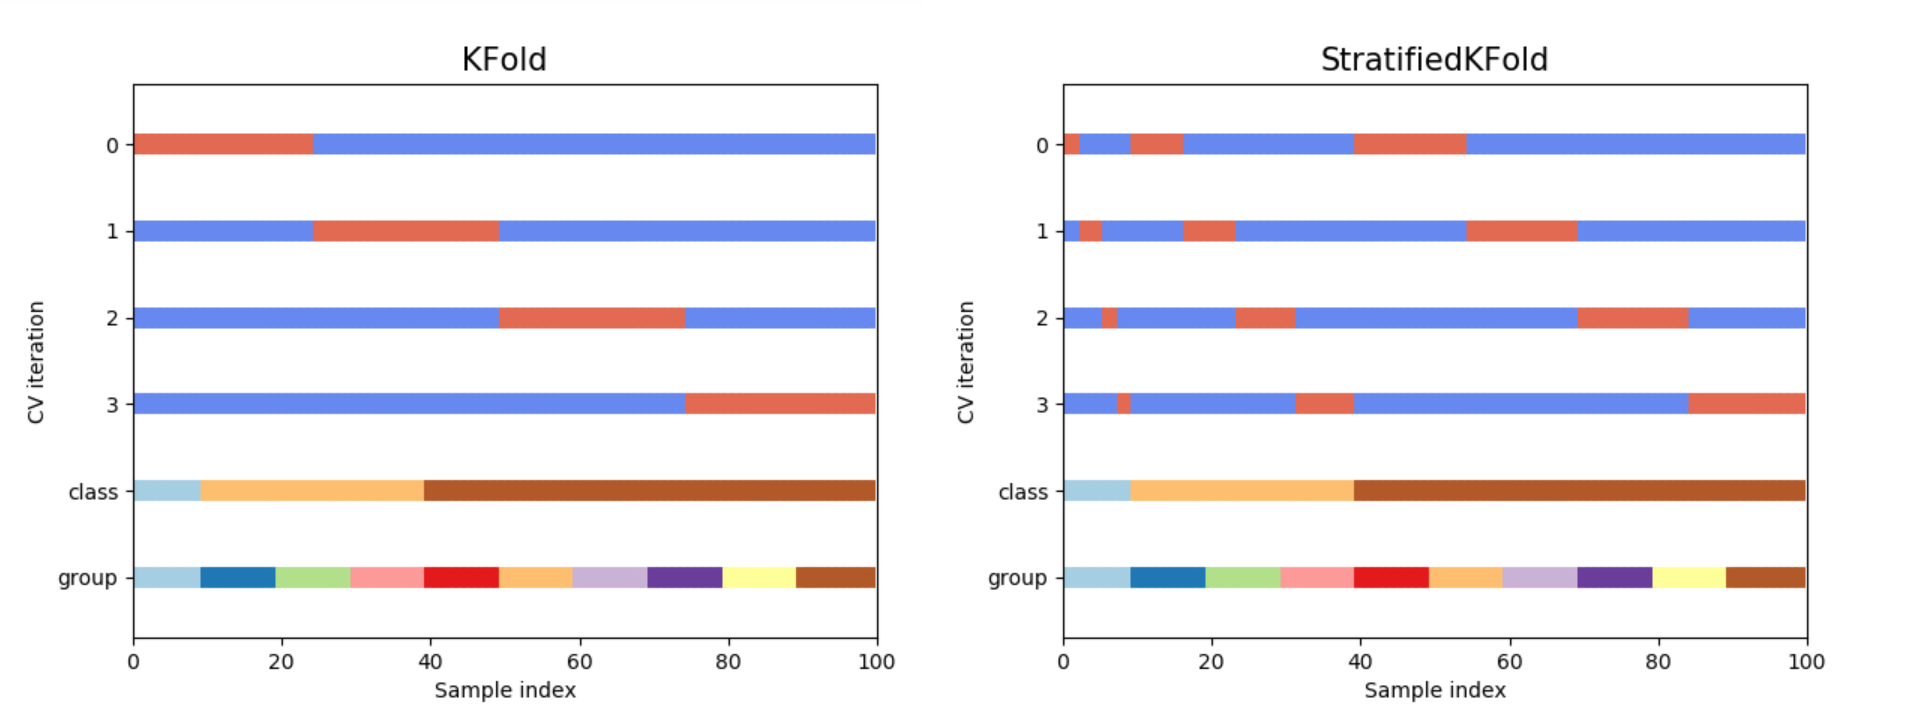

In [65]:
display(Image('slike/stratified_kfold.png'))[4]

In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold

def stratified_k_fold(classifier, df_train):
  skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=4)
  df_labels = pd.DataFrame(labels)
  splits = skf.split(df_train, df_labels)
  scores = np.array([])
  for n,(train_index, test_index) in enumerate(splits):
    X_train, X_test = df_train.iloc[train_index,:], df_train.iloc[test_index,:]
    y_train, y_test = df_labels.iloc[train_index,:], df_labels.iloc[test_index,:]
    y_test = np.ravel(y_test)
    y_train = np.ravel(y_train)
    scores = np.append(scores, np.array([classifier.fit(X_train, y_train).score(X_test, y_test).mean()]), axis=None)
    # print(f'SPLIT NO {n+1}\nTRAINING SET SIZE: {np.round(len(train_index) / (len(train_index)+len(test_index)),2)}'+
    #         f'\tTEST SET SIZE: {np.round(len(test_index) / (len(train_index)+len(test_index)),2)}\nPROPORTION OF TARGET IN THE TRAINING SET\n'+
    #         f'{df_train.iloc[test_index,5].value_counts() / len(df_train.iloc[test_index,5])}\nPROPORTION OF TARGET IN THE TEST SET\n'+
    #         f'{df_train.iloc[train_index,5].value_counts() / len(df_train.iloc[train_index,5])}\n\n')
  return scores


###**Obuƒçavanje klasifikacionih modela**

#####**Vrste klasifikatora**
Za zadatak klasifikacije razvijeno je ≈°est modela:

*   **SGD Classifier (Stochastic Gradient Descent)**
*   **Random Forest Classifier**
*   **KNeighbors Classifier**
*   **SVM Classifier (Support Vector Machine)**
*   **Naive Bayes Classifier**
*   **MLP (Multilayer Perceptron)**





#####**Uspe≈°nost klasifikacije**
Kao standardna mera uspe≈°nosti klasifikacije, kori≈°ƒáena je taƒçnost klasifikacije (engl.
classification accuracy). Taƒçnost klasifikacije se defini≈°e kao broj taƒçno klasifikovanih slika u
odnosu na ukupan broj slika u test skupu, izra≈æen u procentima:

ùê¥ùê∂ùê∂ =
ùëèùëüùëúùëó ùë°ùëéƒçùëõùëú ùëòùëôùëéùë†ùëñùëìùëñùëòùëúùë£ùëéùëõùëñ‚Ñé ùë†ùëôùëñùëòùëé/ùë¢ùëòùë¢ùëùùëéùëõ ùëèùëüùëúùëó ùë†ùëôùëñùëòùëé ùë°ùëíùë†ùë° ùë†ùëòùë¢ùëùùëé √ó 100%

#####**Bias-variance tradeoff**

Bias - razlika izmeƒëu proseƒçne predikcije modela i vrednosti koju poku≈°ava da predvidi; gre≈°ka koja se javlja prilikom predikcije.

Variance - varijabilnost predikcije; gre≈°ka koja nastaje zbog prevelike osetljivosti na male fluktuacije u trening skupu.

Visok bias oznaƒçava da model nije nauƒçio bitne povezanosti karakteristike podataka i vrednosti koje se predviƒëaju, odnosno model underfit-uje.

Visoka varijansa rezultat je uƒçenja modela na ≈°umu, odnosno model lo≈°e generalizuje i klasifikuje podatke koje variraju po vrednostima u odnosu na podatke iz trening skupa, odnosno model overfit-uje.

Tehnika unakrsne validacije sa k fold-ova za svaki od fold-ova izraƒçunava taƒçnost klasifikacije, pa se taƒçnost klasifikacije modela raƒçuna kao proseƒçna taƒçnost u k fold-ova. Pored proseƒçne vrednosti, na osnovu skupa od k vrednosti taƒçnosti klasifikacije moguƒáe je izraƒçunati standardnu devijaciju ovog skupa vrednosti. Standarna devijacija ukazuje na varijansu modela, dok taƒçnost ukazuje na visok ili nizak bias.

Problem bias-variance tradeoff-a odnosi se na poku≈°aje da se istovremeno minimizuju obe vrste gre≈°ke koje onemoguƒáavaju da model generalizuje. Odnosno, potrebno je pronaƒái dobar balans izmeƒëu bias-a i varijanse tako da se minimizuje ukupna gre≈°ka modela [4].

*Total Error* = *Bias*^2 + *Variance* + *Irreducible Error*


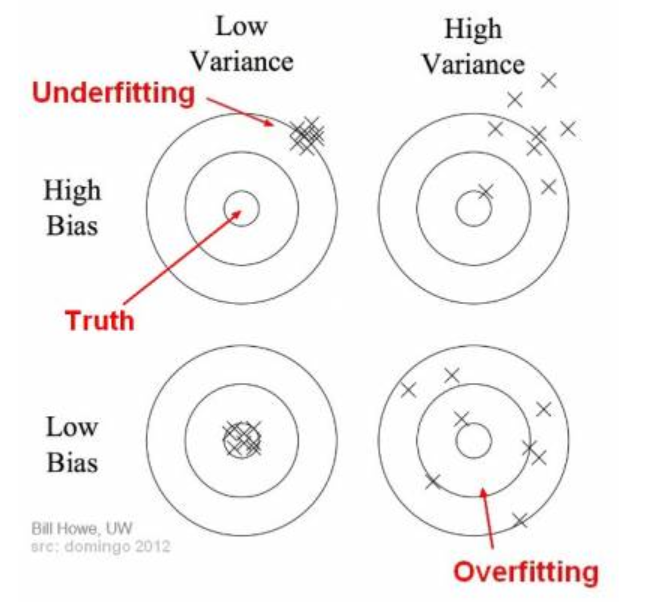

In [66]:
display(Image('slike/bias_variance_tradeoff.png'))

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

def train_model(classifier, X_train, X_test, y_train, y_test):
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  cm = confusion_matrix(y_test, y_pred)
  print(accuracy)
  #print(cm)
  #print(classification_report(y_test, grid_predictions))
  return accuracy

####**SGD Classifier**

SGD predstavlja linearni klasifikator (Support Vector Machine, Logistiƒçka regresija) koji koristi stohastiƒçki gradijentni spust prilikom treniranja. Prilikom treniranja raƒçuna se gradijent funkcije gubitka i model a≈æurira promenom parametara modela kako bi se ova funkcija minimizovala. 

#####**Stohastic Gradient Descent** 

Stohastiƒçki gradijentni spust je iterativna metoda za optimizaciju funkcije gre≈°ke (loss/cost function). Predstavlja stohastiƒçku aproksimaciju gradijentnog spusta, jer gradijent nije izraƒçunat nad celim skupom podataka, veƒá na delu. 


In [28]:
from sklearn.linear_model import SGDClassifier

classifier = SGDClassifier()
#0.6121212121212122
scores = stratified_k_fold(classifier, df_train)
print(scores)
sgd_acc = np.mean(scores, dtype=np.float64)
sgd_std = np.std(scores, dtype=np.float64)
print(sgd_acc)
print(sgd_std)


[0.50505051 0.63636364 0.66161616 0.56565657 0.69191919]
0.6121212121212122
0.06786495770602353


####**Random Forest Classifier**

Random Forest, odnosno nasumiƒçna suma, je algoritam nadgledanog uƒçenja koji gradi ansambl stabla odluƒçivanja. Stablo odluƒçivanja je model koji se gradi u obliku stabla koje se sastoji iz listova i grana, pri ƒçemu svaka grana vodi do ƒçvora u kom ƒáe se naƒái instance skupa podataka koje zadovoljavaju uslov vrednosti obele≈æja instance koji je definisan za datu granu. Svaki list ovog stabla nosi vrednost jedne od klasa, tako da se prolazeƒái kroz stablo proveravaju vrednosti atributa instance sve dok se instanca ne naƒëe u listu koji joj dodeljuje jednu od klasa [5].

Random Forest algoritam klasifikuje instancu sprovodeƒái je kroz svako od stabala odluke i zatim se instanci dodeljuje klasa koja je bila izglasana najvi≈°e puta.

RandomForestClassifier biblioteke sklearn prima parametar n_estimators koji odreƒëuje broj stabala odluke. Parametar criterion odreƒëuje meru kvaliteta koja se koristi za dono≈°enje odluke o podeli ƒçvora i koristi prilikom gradnje stabala. Default-na vrednost broja stabala odluke je 100, kriterijum podele je Gini. 




In [29]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
#0.9787878787878788
scores = stratified_k_fold(classifier, df_train)
print(scores)
rndf_acc = np.mean(scores, dtype=np.float64)
rndf_std = np.std(scores, dtype=np.float64)
print(rndf_acc)
print(rndf_std)

[0.97474747 0.97474747 0.98484848 0.97979798 0.97979798]
0.9787878787878788
0.0037794519058322886


#### **KNeighbours Classificator**

Algoritam k najbli≈æih suseda klasifikuje instancu posmatrajuƒái k njoj najbli≈æih suseda, tako ≈°to joj dodeljuje klasu kojoj pripada najveƒái broj njenih suseda. 

Za klasifikator biblioteke sklearn defaultna vrednost broja suseda koji se razmatraju je 5.


In [30]:
from sklearn import neighbors

classifier = neighbors.KNeighborsClassifier()
#0.8585858585858585
scores = stratified_k_fold(classifier, df_train)
print(scores)
knn_acc = np.mean(scores, dtype=np.float64)
knn_std = np.std(scores, dtype=np.float64)
print(knn_acc)
print(knn_std)


[0.85353535 0.83333333 0.87373737 0.88888889 0.84343434]
0.8585858585858585
0.020202020202020176


####**SVM**

Cilj ovog algoritma je pronaƒái hyperplane u N-dimenzionalnom prostoru koji na najbolji naƒçin razdvaja instance razliƒçitih klasa.

Support vector-i su taƒçke koje su najbli≈æe hyperplane-u i utiƒçu na njegovu orijentaciju. Koristeƒái ove vektore, maksimizuje se margina klasifikatora, odnosno posti≈æe se najbolje razdvajanje klasa u prostoru. 

SVM je izvorno binarni klasifikator, pa se u sluƒçaju klasifikacionog zadatka sa vi≈°e klasa ovaj zadatak ra≈°ƒçlanjuje na vi≈°e binarnih klasifikacionih problema. 

**Kernel SVM-a**

Kernel koristi postojeƒáe karakteristike podataka, primenjuje transformacije nad njima i tako kreira nove karakteristike. Na ovaj naƒçin transformi≈°e se prostor u kom se podaci posmatraju i omoguƒáava pronala≈æenje nelinearnih granica odluke.


Parametri modela:


*   C - regularizacioni parmetar 
*   kernel - tip kernela koji se koristi (‚Äòlinear‚Äô, ‚Äòpoly‚Äô, ‚Äòrbf‚Äô, ‚Äòsigmoid‚Äô, ‚Äòprecomputed‚Äô)
*   gamma - koeficijent za ‚Äòrbf‚Äô, ‚Äòpoly‚Äô i ‚Äòsigmoid‚Äô kernele





In [31]:
from sklearn import svm

#default=‚Äôrbf‚Äô
classifier = svm.SVC(gamma=0.001, C=100.)
#0.7949494949494949
scores = stratified_k_fold(classifier, df_train)
print(scores)
svm_acc = np.mean(scores, dtype=np.float64)
svm_std = np.std(scores, dtype=np.float64)
print(svm_acc)
print(svm_std)


[0.76262626 0.76767677 0.81313131 0.82323232 0.80808081]
0.7949494949494949
0.02486572449513368


#####**Optimizacija hiperparametara**

Performanse modela znaƒçajno mogu da budu pobolj≈°ane za razliƒçite vrednosti parametara modela. Ovi parametri se nazivaju hiperparametri, jer predstavljaju parametre modela koji se ne uƒçe, veƒá se odreƒëuju prilikom izgradnje modela pre same faze treniranja (C, kernel, gamma).

Optimizacija hiperparametara je problem odabira optimalnih vrednosti hiperparametara modela. Vrednosti ovih parametara kontroli≈°u uƒçenje modela i potrebno je podesiti ih kako bi model optimalno re≈°avao postavljen zadatak.

Postoji vi≈°e pristupa:
*  **Grid search** - tradicionalna tehnika iscrpnog tra≈æenja najboljih vrednosti iz predefinisanog skupa vrednosti koje se razmatraju.
*	**Random search** - nasumiƒçan odabir kombinacija vrednosti hiperparametara.
* **Bayesian** - probabilistiƒçki model, istra≈æuje prostor moguƒáih vrednosti na osnovu prethodnih zapa≈æanja.
* **Gradient-based optimization** - optimizacija parametara upotrebom gradijentnog spusta.

U sluƒçaju SVM modela, biƒáe razmatrane unapred definisane moguƒáe vrednosti parametara i buduƒái da ovaj zadatak ne podrazumeva previ≈°e vremenskih resursa, koristi se Grid Search tehnika.




In [32]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'poly', 'sigmoid']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(df_train, np.ravel(labels))
clear()
# print best parameter after tuning
print(grid.best_params_)
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)


{'C': 100, 'gamma': 1, 'kernel': 'sigmoid'}
SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [33]:
#{'C': 1000, 'gamma': 1, 'kernel': 'sigmoid'}
classifier = svm.SVC(gamma=1, C=1000., kernel='sigmoid')
#0.9474747474747476
scores = stratified_k_fold(classifier, df_train)
print(scores)
grid_acc = np.mean(scores, dtype=np.float64)
grid_std = np.std(scores, dtype=np.float64)
print(grid_acc)
print(grid_std)


[0.91919192 0.94949495 0.95454545 0.98989899 0.92424242]
0.9474747474747476
0.0252727191983774


Pode≈°avanje hiperparametara modela znaƒçajno je pobolj≈°alo taƒçnost modela.

####**Naive Bayes**

Ovaj klasifikator pripada grupi probabilistiƒçkih klasifikaora i zasnovan je na Bajesovoj teoremi. Ova teorema pronalazi verovatnoƒáu da se dogaƒëaj dogodi s obzirom na verovatnoƒáu drugog dogaƒëaja koji se dogodio.


Osnovna pretpostavka ovog algoritma je da su karakteristike nezavisne i sa jednakim uticajem na ishod klasifikacije. 

Kori≈°ƒáen je Gaussian Naive Bayes klasifikator, koji postavlja polaznu pretpostavku da vrednosti obele≈æja imaju Gausovu raspodelu [6].

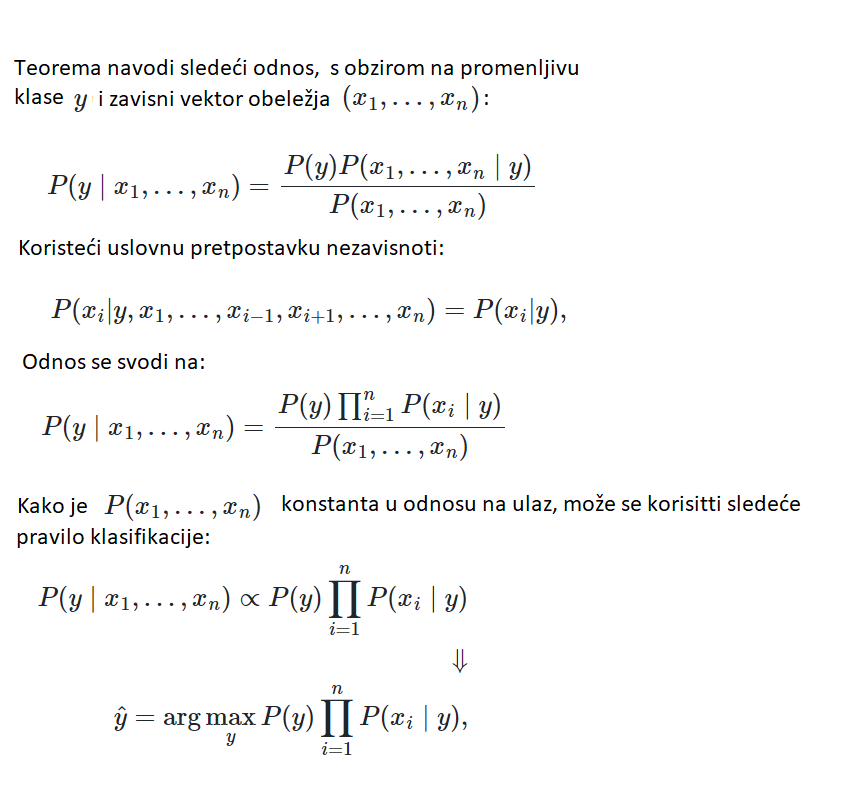

In [67]:
display(Image('slike/bajesova_teorema.png'))

In [34]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
#0.5525252525252526
scores = stratified_k_fold(classifier, df_train)
print(scores)
nb_acc = np.mean(scores, dtype=np.float64)
nb_std = np.std(scores, dtype=np.float64)
print(nb_acc)
print(nb_std)

[0.59090909 0.59090909 0.46969697 0.55555556 0.55555556]
0.5525252525252526
0.044329511631296344


Klasifikator daje lo≈°ije klasifikacione rezultate i glavna pretpostavka je da je razlog ovome promenljive koje nisu sasvim nezavisne. Iz ovog razloga, kori≈°ƒáena je PCA tehnika ekstrakcije feature-a, koja omoguƒáava transformisanje skupova koreliranih promenljivih, poput karakteristika listova, u linearno nekorelirane, ortogonalne vektore (principal components). 

#####**Feature Extraction**

Algoritam PCA konstrui≈°e novi skup svojstava na osnovu kombinacije starih. Matematiƒçki gledano, PCA izvodi linearnu transformaciju preme≈°tajucÃÅi originalni skup karakteristika u novi prostor sastavljen od glavnih komponenti (eng. principal components).

Kardinalnost skupa karakteristika, odnosno komponenti,u izlazu mo≈æe biti manji od broja ulaznih karakteristika, ponekad sve informacije ulaznih karakteristika mogu biti sadr≈æane u manjem broju vektora, pa se iz tog razloga PCA ƒçesto koristi kao metoda redukcije dimenzionalnosti. 

Njegova primena u sklearn biblioteci zasniva se na dekompoziciji singularne vrednosti (eng. Singular Value Decomposition - SVD), metodi za izdvajanje  eigenvector-a, ortogonalnih vektora, pomocÃÅu faktorizacije matrice ulaznih karakteristika.


Tehnike redukcije dimenzionalnosti koriste se kako bi se klasifikacioni model trenirao na manjem broju feature-a i tako se pobolj≈°ala performantnost. Pored toga, ove tehnike mogu dovesti i do unapreƒëenja taƒçnosti modela, re≈°avajuƒái se redundantnih karakteristika dok zadr≈æavaju karakteristike velike varijanse za koje postoji veƒáa verovatnoƒáa da ƒáe dati dobru podelu izmeƒëu klasa. 

PCA model biblioteke sklearn se inicijalizuje odabirom vrednosti parametara n_components i svd_solver. Vrednosti mle i full ovih parametara obezbeƒëuju da rezultat ove analize bude minimalni broj potrebnih izlaznih komponenti kako bi se odr≈æale iste informacije koje dolaze iz ulaznih karakteristika i  SVD se re≈°ava u potpunosti.


In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 'mle', svd_solver = 'full')
df_train_pca=pca.fit_transform(df_train)
print("Number of descriptors before PCA: " + '{:1.0f}'.format(df_train.shape[1]))
print("Number of descriptors after PCA: " + '{:1.0f}'.format(df_train_pca.shape[1]))

Number of descriptors before PCA: 192
Number of descriptors after PCA: 191


In [36]:
classifier = GaussianNB()
#0.9585858585858587
scores = stratified_k_fold(classifier, pd.DataFrame(df_train_pca))
print(scores)
nb_pca_acc = np.mean(scores, dtype=np.float64)
nb_pca_std = np.std(scores, dtype=np.float64)
print(nb_pca_acc)
print(nb_pca_std)


[0.94444444 0.94949495 0.96969697 0.98989899 0.93939394]
0.9585858585858587
0.01873458281918325


Obuƒçavanjem Naive Bayes klasifikatora na ulaznim podacima koji su transformisani nakon PCA analize, rezultati su se znaƒçajno pobolj≈°ali, jer je sada pretpostavka o nezavisnosti karakteristika taƒçna.

In [37]:
models = pd.DataFrame({
    'Model': ['SGD Classifier','Random Forest Classifier','K Neighbors Classifier', 
              'SVM Classifier', 'SVM Paramater Tunning', 'Naive Bayes', 'Naive Bayes PCA'],

    'Score': [sgd_acc,
              rndf_acc,
              knn_acc, 
              svm_acc,
              grid_acc,
              nb_acc,
              nb_pca_acc],
    'Standard diviation': [sgd_std,
              rndf_std,
              knn_std, 
              svm_std,
              grid_std,
              nb_std,
              nb_pca_std]},

              )
models.sort_values(by='Score', ascending=True)

Model     Score  Standard diviation
5               Naive Bayes  0.552525            0.044330
0            SGD Classifier  0.612121            0.067865
3            SVM Classifier  0.794949            0.024866
2    K Neighbors Classifier  0.858586            0.020202
4     SVM Paramater Tunning  0.947475            0.025273
6           Naive Bayes PCA  0.958586            0.018735
1  Random Forest Classifier  0.978788            0.003779

Klasifikatori sa najvi≈°e uspe≈°nosti su Random Forest Classifier, Naive Bayes uz PCA i SVM sa pode≈°enim parametrima.

####**MLP**

MLP (Multilayer perceptron) model jo≈° poznat feedforward nerural network ili deep feedforward network predstavlja matematiƒçki formalizam za aproksimaciju funkcije. Na primeru zadatka klasifikacije, klasifikator y=f‚àó(x) mapira input x u kategoriju (klasu) y. Ovaj model defini≈°e mapiranje y=f(x;Œ∏) i uƒçi parametre Œ∏ kako bi se postigla najbolja aproksimacija funkcije f. 


Ovi modeli se nazivaju feedforward, jer informacija struji kroz funkciju koja se aproksimira od x, kroz posredne proraƒçune koje se defini≈°u za funkciju f i konaƒçno do izlaza y. Ne postoje povratne veze u kojima se izlazi modela vracÃÅaju nazad u model [7].

#####**Universal approximation theorem**
U matematiƒçkoj teoriji ve≈°taƒçkih neuronskih mre≈æa, teoreme o univerzalnoj aproksimaciji su rezultati [8] koji se tiƒçu tipiƒçno aproksimacionih mogucÃÅnosti napredne arhitekture na prostoru kontinuiranih funkcija. Univerzalne teoreme aproksimacije podrazumevaju da neuronske mre≈æe mogu predstavljati, odnosno aproksimirati, ≈°irok spektar funkcija kada im se daju odgovarajucÃÅe te≈æine. 

Neuronske mre≈æe se mogu shvatiti kao klasa funkcija koje se sla≈æu hijerarhijski kako bi se dobila kompleksna nelinearna funkcija. Predstavljaju ideju vi≈°e faza hijerarhijskog raƒçunanja prolaskom kroz slojeve linearnih funkcija izmeƒëu kojih se postavljaju nelinearne funkcije [9].

Neuronska mre≈æa sastoji se iz vi≈°e slojeva neurona, gde su neuroni svakog sloja povezani sa neuronima prethodnog sloja. Prvi sloj se naziva inuput sloj, poslednji output sloj, dok se ostali slojevi izmeƒëu ova dva nazivaju hidden. Mre≈æa funkcioni≈°e tako ≈°to vrednosti neurona jednog sloja, koje se jo≈° nazivaju aktivacije, utiƒçu na aktivacije neurona sledeƒáeg sloja. Sr≈æ ideje neuronskih mre≈æa je obrada informacija kojom informacije jednog sloja neurona utiƒçu na izraƒçunavanje informacija koje nose neuroni narednog sloja. Izraƒçunavanje vrednosti neurona narednog sloja mre≈æe mo≈æe se posmatrati kao izraƒçunavanje funkcije koja za ulazne parametre dobija aktivacione vrednosti neurona prethodnog sloja i vrednosti te≈æinskih faktora koji se dodeljuju vezama neurona dva sloja.




#####**Backpropagation algoritam**

Te≈æinski faktori neurona su parametri koji se raƒçunaju prilikom treniranja neuronske mre≈æe optimizacijom funkcije gubitka (loss function). Funkcija gubitka govori koliko je dobar rezultat koji je neuronska mre≈æa dala. Imajuƒái ovo u vidu, treniranje mre≈æe predstavlja proces minimizacije vrednosti funkcije gubitka, koji zapravo predstavlja pronalazak vrednosti ƒçijom primenom se vrednosti parametara menjanju tako da omoguƒáavaju taƒçna predviƒëanja rezultata aproksimirane funkcije. Ova vrednost kojom treba podesiti vrednost parametara predstavlja negativan gradijent funkcije gubitka. Vrednost negativnog gradijenta funkcije gubitka raƒçuna se primenom algoritma backwards propagation ‚Äì unazadne propagacije. 

In [38]:
#Neural Network Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.activations import relu,softmax

print(df_train_copy.shape)
print(df_test_copy.shape)
print(labels_copy.shape)

(990, 192)
(594, 192)
(990,)


In [39]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit_transform(df_train_copy)

array([[-0.48661074, -0.13135701, -0.33095592, ..., -0.39487147,
        -0.65214311,  0.26239707],
       [-0.58560191, -0.73488047, -0.02856115, ..., -0.49497401,
         2.18166976,  0.13364087],
       [-0.58560191, -0.48340807, -0.48219201, ..., -0.52001246,
         0.83564129, -0.72463124],
       ...,
       [-0.78358426, -0.63430181, -1.23821765, ...,  0.1807566 ,
        -0.65214311, -0.76756462],
       [-0.88257543, -0.73488047,  0.5762671 , ..., -0.52001246,
        -0.51045972, -0.72463124],
       [ 0.30542003, -0.23196142, -0.02856115, ...,  0.08065405,
         1.18988604,  0.13364087]])

Pored skaliranja podataka, kao i u sluƒçaju obuƒçavanja prethodnih modela, potrebno je kodirati kategoriƒçke podatke sa kojima model radi, odnosno labele.

Postoji vi≈°e naƒçina za kodiranje:

* Celobrojno kodiranje - jedinstvena 
oznaka se preslikava u ceo broj (LabelEncoder).
* One Hot Encoding - svaka oznaka se preslikava u binarni vektor.
* Nauƒçene reprezentacije

Kori≈°ƒáen je OneHotEncoder biblioteke sklearn.


In [40]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
labels_copy = pd.DataFrame(labels_copy)
labels_one_hot = ohe.fit_transform(labels_copy.values.reshape(-1, 1)).toarray()
print(labels_one_hot.shape)
print(labels_one_hot[0])

(990, 99)
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]


Kao i u sluƒçaju obuƒçavanja prethodnih modela, izvr≈°ena je stratifikovana podela na podatke za treniranje i validaciju, kao i za testiranje nakon zavr≈°ene faze treniranja i validacije.

U sluƒçaju prethodnih modela vr≈°ile su se procene performansi modela tehnikom unakrsne validacije, ≈°to je u sluƒçaju ovih modela izostavljeno.

In [41]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1,random_state=42)
train_index, test_index = next(iter(sss.split(df_train_copy, labels_one_hot)))
X_train_nn, X_test_nn = df_train_copy.iloc[train_index,:], df_train_copy.iloc[test_index,:]
y_train_nn, y_test_nn = labels_one_hot[train_index], labels_one_hot[test_index]

# Ponovna stratifikovana podela nije izvodljiva 
# sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1,random_state=42)
# train_index, val_index = next(iter(sss.split(X_train_nn, y_train_nn)))
# X_train_nn, X_val_nn = df_train_copy.iloc[train_index,:], df_train_copy.iloc[val_index,:]
# y_train_nn, y_val_nn = labels_one_hot[train_index], labels_one_hot[val_index]
X_train_nn, X_val_nn, y_train_nn, y_val_nn = train_test_split(X_train_nn, y_train_nn, test_size=0.10, random_state=42)
print("x_train dim: ",X_train_nn.shape)
print("x_test dim:   ",X_test_nn.shape)
print("x_val dim:   ",X_val_nn.shape)
print()

x_train dim:  (801, 192)
x_test dim:    (99, 192)
x_val dim:    (90, 192)



Aktivacione funkcije se koriste na kraju hidden layer-a i uvode nelinearnu slo≈æenost u model. Kori≈°ƒáena je RELU aktivaciona funkcija.

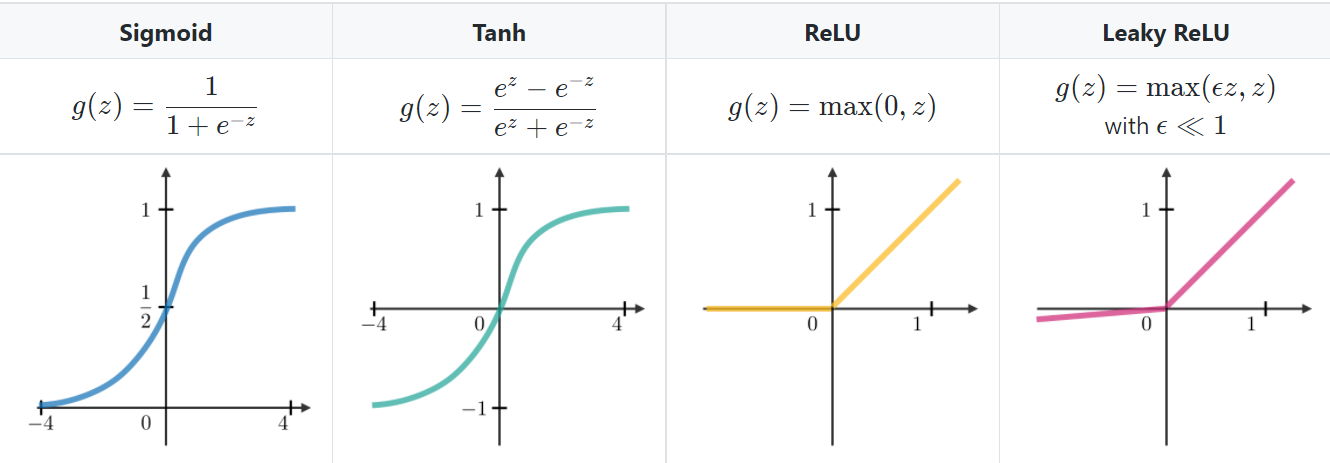

In [68]:
display(Image('slike/aktivacione_funkcije.png'))

Svi slojevi su Dense slojevi, potpuno povezani slojevi sa definisanim brojem neurona. Poslednji sloj za aktivacionu funkciju ima softmax funkciju. Ova funkcija pretvara vektor K realnih vrednosti u vektor K realnih vrednosti ƒçija je suma 1. Drugim reƒçima, softmax na izlazu dodeljuje decimalnu verovatnocÃÅu za svaku od klasa multi-class problema i suma ovih decimalnih verovatnocÃÅa iznosi 1, tako da se za predviƒëenu klasu uzima klasa sa najveƒáom verovatnoƒáom.

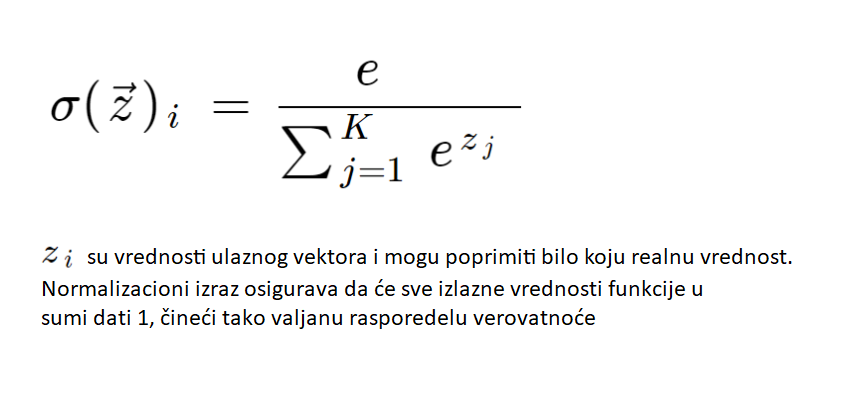

In [69]:
display(Image('slike/softmax.png'))

In [42]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.activations import relu,softmax

model = Sequential()
model.add(Dense(256, input_dim=192, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(600, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1600, activation='relu'))
model.add(Dense(99, activation='softmax'))

Categorical Cross-Entropy loss se jo≈° naziva i Softmax loss i koristi se u sluƒçajevima multi-class klasifikacije. U problemu sa C klasa formula je sledeƒáa [10]:

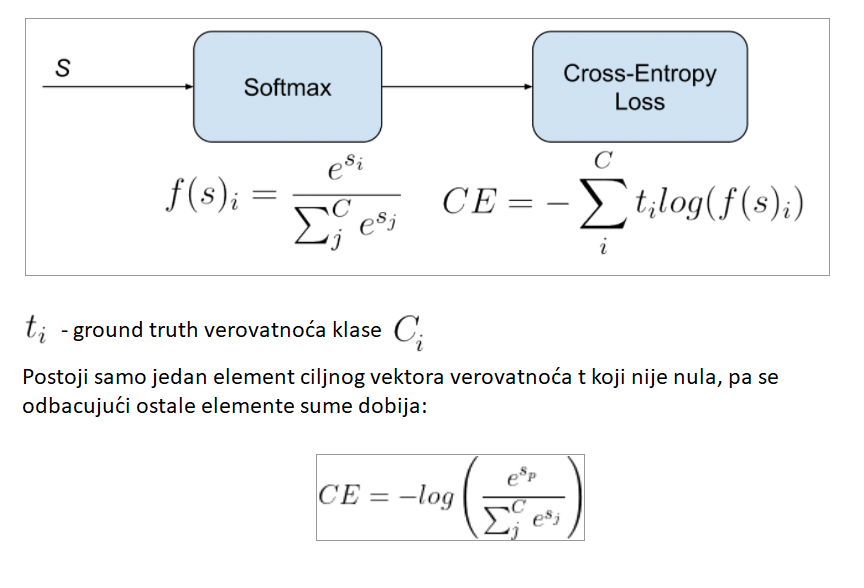

In [70]:
display(Image('slike/cross_entropy_loss.png'))

#####**Optimizacioni algoritam**

Pri kompajliranju modela, prosleƒëuju se parametri loss, optimizer i metrics, koji redom predstavljaju funkciju gubitka koja se koristi prilikom obuƒçavanja modela, algoritam optimizacije koji se pritom koristi i metrike koje se prate.

Neki od algoritama optimizacije su:
* SGD (Stochastic Gradient Descent)
* RMSprop (Root Mean Square Propogation)
* Adam

Algoritam optimizacije odreƒëuje brzinu uƒçenja modela, odnosno stopu uƒçenja koja se primenjuje u svakom koraku a≈æuriranja modela. Adam algoritam kombinuje prednosti druga dva optimizatora:

* Algoritam prilagodljivog gradijenta (AdaGrad) - odr≈æava brzinu uƒçenja po parametru koja pobolj≈°ava performanse kod problema sa retkim gradijentima.

* Root Mean Square Propogation (RMSProp) - takoƒëe odr≈æava stope uƒçenja po parametru koje su prilagoƒëene na osnovu proseka nedavnih veliƒçina gradijenata za te≈æinu (npr. Koliko se brzo menja). 

Umesto da prilagoƒëava stope uƒçenja parametara na osnovu proseƒçnog prvog momenta (srednje vrednosti) kao u RMSProp-u, Adam takoƒëe koristi prosek drugih momenata gradijenata (necentrirana varijansa).
Algoritam izraƒçunava eksponencijalni pokretni prosek gradijenta i kvadratnog gradijenta, a parametri beta1 i beta2 kontroli≈°u stope propadanja ovih pokretnih proseka [11].

In [43]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Prilikom obuƒçavanja modela, defini≈°e se broj epoha, pri ƒçemu epoha predstavlja prolazak preko celokupnog skupa trening podataka. Epoha se sastoji iz iteracija, gde broj iteracija zavisi od veliƒçine batch-a (broj uzoraka po a≈æuriranju gradijenta). Nakon svake iteracije i prolaska kroz odreƒëeni broj podataka (odreƒëen veliƒçinom batch-a), na osnovu sraƒçunate funkcije gubitka se vr≈°e pode≈°avanja parametara i zatim uz pomoƒá validacionih podataka raƒçuna taƒçnost modela.


In [44]:
from keras.callbacks import ModelCheckpoint

checkpointer=ModelCheckpoint(filepath='nn_model.hdf5',verbose=1,save_best_only=True)
history = model.fit(X_train_nn, y_train_nn, epochs=100,
                    validation_data=(X_val_nn, y_val_nn),callbacks=[checkpointer])

Epoch 1/100
26/26 [==============================] - 15s 62ms/step - loss: 4.5929 - accuracy: 0.0183 - val_loss: 4.3906 - val_accuracy: 0.0111

Epoch 00001: val_loss improved from inf to 4.39060, saving model to nn_model.hdf5
Epoch 2/100
26/26 [==============================] - 1s 35ms/step - loss: 4.1801 - accuracy: 0.0474 - val_loss: 3.7785 - val_accuracy: 0.0444

Epoch 00002: val_loss improved from 4.39060 to 3.77853, saving model to nn_model.hdf5
Epoch 3/100
26/26 [==============================] - 1s 37ms/step - loss: 3.3667 - accuracy: 0.1192 - val_loss: 2.5753 - val_accuracy: 0.2222

Epoch 00003: val_loss improved from 3.77853 to 2.57528, saving model to nn_model.hdf5
Epoch 4/100
26/26 [==============================] - 1s 36ms/step - loss: 2.2825 - accuracy: 0.3249 - val_loss: 2.0713 - val_accuracy: 0.2889

Epoch 00004: val_loss improved from 2.57528 to 2.07132, saving model to nn_model.hdf5
Epoch 5/100
26/26 [==============================] - 1s 35ms/step - loss: 1.7690 - accu

Definisane su metode koje za prosleƒëen model i istoriju obuƒçavanja modela ispisuju taƒçnost modela i grafike koji pokazuju kretanje vrednosti funkcije gubitka i taƒçnosti klasifikacije modela kroz epohe. Na osnovu ovih grafika analizirana je performansa modela i dalji koraci njegovog pobolj≈°anja.

In [45]:
def print_scores(X_train_nn, y_train_nn, X_test_nn, y_test_nn, model):
  score=model.evaluate(X_train_nn,y_train_nn,verbose=1)              
  accuracy=100*score[1]                                       
  print('Test accuracy on train data is %.4f%%' % accuracy)

  score=model.evaluate(X_test_nn,y_test_nn,verbose=1)               
  accuracy=100*score[1]                                       
  print('Test accuracy on test data is %.4f%%' % accuracy)

In [46]:
import matplotlib.pyplot as plt
def print_and_plot_history(history):
  print('val_acc: ',max(history.history['val_accuracy']))
  print('val_loss: ',min(history.history['val_loss']))
  print('train_acc: ',max(history.history['accuracy']))
  print('train_loss: ',min(history.history['loss']))
  print("train/val loss ratio: ", min(history.history['loss'])/min(history.history['val_loss']))

  plt.semilogy(history.history['loss'])
  plt.semilogy(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()


26/26 [==============================] - 0s 7ms/step - loss: 3.6026e-06 - accuracy: 1.0000
Test accuracy on train data is 100.0000%
4/4 [==============================] - 0s 9ms/step - loss: 0.6295 - accuracy: 0.8889
Test accuracy on test data is 88.8889%
val_acc:  0.8999999761581421
val_loss:  0.3506124019622803
train_acc:  1.0
train_loss:  3.8135960949148284e-06
train/val loss ratio:  1.0876957214209166e-05


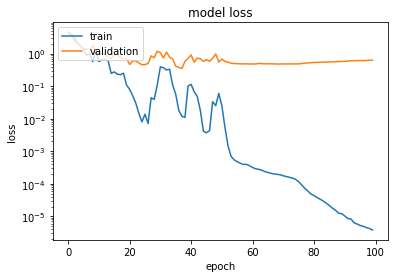

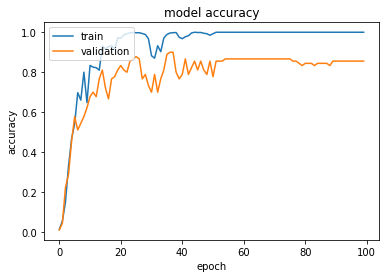

In [47]:
print_scores(X_train_nn, y_train_nn, X_test_nn, y_test_nn, model)
print_and_plot_history(history)

Train loss nastavlja da opada dok validacioni stagnira, ≈°to mo≈æe da uka≈æe na overfitting koji ƒáe dalje biti razmatran. Vrednosti taƒçnosti i gubitka fluktuiraju i pretpostavka je da se ovo de≈°ava iz sledeƒáih ili nekog od sledeƒáih razloga: 

*   Model je previ≈°e veliki - zbog ovoga je te≈°ko naƒái lokalne minimume pode≈°avanjem velikog broja parametara trenirajuƒái nad malom koliƒçinom podataka. 
*   Premala vrednost parametra treniranja batch_size - mo≈æe se desiti da pogre≈°no labelirani podaci dovedu do a≈æuriranja parametara modela tako da se udaljava od lokalnog minimuma, ovaj efekat je izra≈æen u sluƒçajevima a≈æuriranja parametara modela na malom delu podataka (batch_size ima premalu vrednost). Takoƒëe, u dataset-u postoji 99 klasa, pa bi mali batch_size onemoguƒáio da se u skupu podataka na osnovu kojih se pode≈°avaju parametri modela naƒëe veƒái broj klasa.

U nastavku model je upro≈°ƒáen i default-na vrednost batch_size-a 32 je promenjena na 192.





In [48]:
modelv2 = Sequential()
modelv2.add(Dense(256, input_dim=192, activation='relu'))
modelv2.add(Dense(512, activation='relu'))
modelv2.add(Dense(600, activation='relu'))
modelv2.add(Dense(99, activation='softmax'))

In [49]:
modelv2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
checkpointer=ModelCheckpoint(filepath='nn_modelv2.hdf5',verbose=1,save_best_only=True)
historyv2 = modelv2.fit(X_train_nn, y_train_nn, epochs=100, batch_size=192,
                    validation_data=(X_val_nn, y_val_nn),callbacks=[checkpointer])

Epoch 1/100
5/5 [==============================] - 1s 118ms/step - loss: 4.5923 - accuracy: 0.0337 - val_loss: 4.5736 - val_accuracy: 0.0667

Epoch 00001: val_loss improved from inf to 4.57356, saving model to nn_modelv2.hdf5
Epoch 2/100
5/5 [==============================] - 0s 20ms/step - loss: 4.5601 - accuracy: 0.1829 - val_loss: 4.5418 - val_accuracy: 0.0667

Epoch 00002: val_loss improved from 4.57356 to 4.54177, saving model to nn_modelv2.hdf5
Epoch 3/100
5/5 [==============================] - 0s 22ms/step - loss: 4.4987 - accuracy: 0.1929 - val_loss: 4.4694 - val_accuracy: 0.0444

Epoch 00003: val_loss improved from 4.54177 to 4.46943, saving model to nn_modelv2.hdf5
Epoch 4/100
5/5 [==============================] - 0s 19ms/step - loss: 4.3864 - accuracy: 0.2251 - val_loss: 4.3392 - val_accuracy: 0.0778

Epoch 00004: val_loss improved from 4.46943 to 4.33924, saving model to nn_modelv2.hdf5
Epoch 5/100
5/5 [==============================] - 0s 24ms/step - loss: 4.1833 - accura

26/26 [==============================] - 0s 3ms/step - loss: 0.0104 - accuracy: 1.0000
Test accuracy on train data is 100.0000%
4/4 [==============================] - 0s 4ms/step - loss: 0.3849 - accuracy: 0.8788
Test accuracy on test data is 87.8788%
val_acc:  0.9333333373069763
val_loss:  0.29176026582717896
train_acc:  1.0
train_loss:  0.012158299796283245
train/val loss ratio:  0.04167222620877746


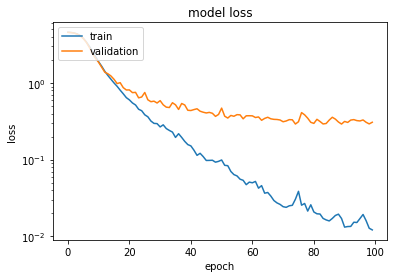

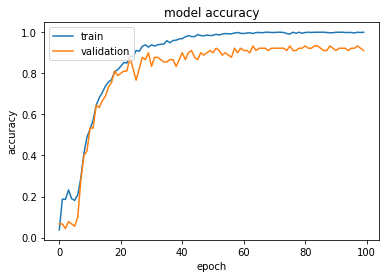

In [50]:
print_scores(X_train_nn, y_train_nn, X_test_nn, y_test_nn, modelv2)
print_and_plot_history(historyv2)

Model se nakon izmena dosta bolje pona≈°a u fazi treniranja.

Kriva koja pokazuje promenu vrednosti funkcije gubitka na trening podacima je dosta strmija od krive koja pokazuje kretanje vrednosti ove funkcije na validacionim podacima, ≈°to mo≈æe da ukazuje na to da nauƒçeni parametri ne obezbeƒëuju dovoljno dobru generalizaciju i predikciju klasa za podatke na kojima model nije treniran. Ova pojava predstavlja overfitting, koji je u ovom sluƒçaju moguƒá zbog obuƒçavanja modela nad malim skupom podataka. 

Overfitting se mo≈æe re≈°iti tako ≈°to se trenira vi≈°e modela razliƒçite arhitekture, a zatim za krajnji rezultat predikcije uzima prosek ili klasa koja je predviƒëena najvi≈°e puta. Dropout predstavlja mehanizam regularizacije koji aproksimira treniranje modela u paraleli. Iz tog razloga, kako bi se re≈°io problem overfitting-a dodat je Dropout sloj. 

Dropout sloj obezbeƒëuje da se prilikom treniranja, sa odreƒëenom verovatnoƒáom, odreƒëeni izlazi sloja ignori≈°u, ƒçime se posti≈æe efekat ≈°uma.


In [51]:
from keras.layers import Dropout

modelv3 = Sequential()
modelv3.add(Dense(256, input_dim=192, activation='relu'))
modelv3.add(Dropout(0.1))
modelv3.add(Dense(512, activation='relu'))
modelv3.add(Dropout(0.1))
modelv3.add(Dense(600, activation='relu'))
modelv3.add(Dense(99, activation='softmax'))


In [52]:
modelv3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [53]:
checkpointer=ModelCheckpoint(filepath='nn_modelv3.hdf5',verbose=1,save_best_only=True)
historyv3 = modelv3.fit(X_train_nn, y_train_nn, epochs=100, batch_size=192,
                    validation_data=(X_val_nn, y_val_nn),callbacks=[checkpointer])

Epoch 1/100
5/5 [==============================] - 2s 127ms/step - loss: 4.5932 - accuracy: 0.0232 - val_loss: 4.5774 - val_accuracy: 0.0667

Epoch 00001: val_loss improved from inf to 4.57743, saving model to nn_modelv3.hdf5
Epoch 2/100
5/5 [==============================] - 0s 23ms/step - loss: 4.5671 - accuracy: 0.0906 - val_loss: 4.5481 - val_accuracy: 0.1333

Epoch 00002: val_loss improved from 4.57743 to 4.54806, saving model to nn_modelv3.hdf5
Epoch 3/100
5/5 [==============================] - 0s 25ms/step - loss: 4.5214 - accuracy: 0.1394 - val_loss: 4.4945 - val_accuracy: 0.0889

Epoch 00003: val_loss improved from 4.54806 to 4.49449, saving model to nn_modelv3.hdf5
Epoch 4/100
5/5 [==============================] - 0s 21ms/step - loss: 4.4284 - accuracy: 0.1083 - val_loss: 4.3933 - val_accuracy: 0.0556

Epoch 00004: val_loss improved from 4.49449 to 4.39326, saving model to nn_modelv3.hdf5
Epoch 5/100
5/5 [==============================] - 0s 21ms/step - loss: 4.2652 - accura

26/26 [==============================] - 0s 3ms/step - loss: 0.0404 - accuracy: 0.9888
Test accuracy on train data is 98.8764%
4/4 [==============================] - 0s 4ms/step - loss: 0.4664 - accuracy: 0.8586
Test accuracy on test data is 85.8586%
val_acc:  0.9333333373069763
val_loss:  0.2742518484592438
train_acc:  0.9962546825408936
train_loss:  0.0455755852162838
train/val loss ratio:  0.1661815060584969


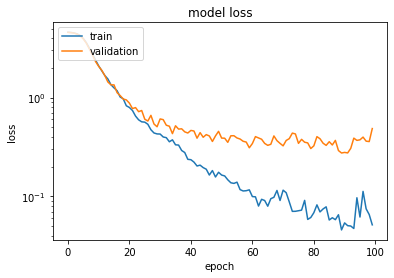

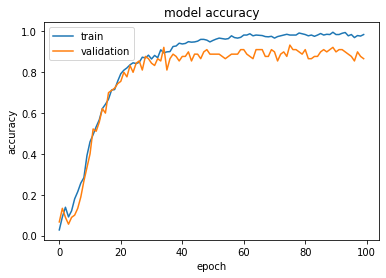

In [54]:
print_scores(X_train_nn, y_train_nn, X_test_nn, y_test_nn, modelv3)
print_and_plot_history(historyv3)

Uspe≈°nost klasifikacije kreiranih modela treba bolje estimirati tehnikama kao ≈°to je unakrsna validacija. Na test podacima se najbolje pokazao drugi model, sa pode≈°enim batch_size-om i redukovanim brojem slojeva. 

###**Zakljuƒçak**

Zadatak klasifikacije biljke na osnovu lista re≈°en je obuƒçavanjem ≈°est modela ma≈°inskog uƒçenja (SGD, Random Forest, KNeighbors, SVM, Naive Bayes i MLP). Ovi modeli obuƒçeni su nad ekstraktovanim feature-ima slika. Uspe≈°nost klasifikacije i estimacija modela postignuta je stratifikovanom unakrsnom validacijom koja obezbeƒëuje posmatranje bias-a i varijanse modela. Model SVM-a unapreƒëen je Grid Search tehnikom optimizacije hiperparametara, a Naive Bayes klasifikator PCA analizom za ekstrakciju feature-a. MLP modeli modifikovani su posmatrajuƒái grafik funkcije gubitka i taƒçnosti modela kroz epohe treniranja. 

Kao najuspe≈°niji klasifikatori pokazali su se Random Forest (97.88 ¬± 0.004), Naive Bayes nakon PCA analize (95.86 ¬±0.019)i SVM sa optimizovanim hiperparametrima (94.74 ¬±0.025). 

Modeli se dalje mogu unaprediti optimizacijom parametara (k u sluƒçaju KNeighbors klasifikatora) ili se bolja uspe≈°nost klasifikacije mo≈æe postiƒái kreiranjem ansambla modela razliƒçite arhitekture MLP-a. Na taƒçnost modela mo≈æe pozitivno uticati treniranje nad veƒáom koliƒçinom podataka, augmentacijom podataka. Dodatno, analizom matrice konfuzije mogu se uoƒçiti klase koje modeli najƒçe≈°ƒáe pogre≈°no klasifikuju (npr. ukoliko postoje dve vrste biljaka koje imaju sliƒçan izgled listova i ƒçesto se me≈°aju) i dodatno unaprediti postupak klasifikacije razvojem novih klasifikatora ili feature-a. 


###**Literatura**


[1] Silva, P.F.B. (2013). *Development of a System for
Automatic Plant Species Recognition* (Master's thesis, Faculty of Science of University Porto, Porto, Portugal). Retrieved from https://repositorio-aberto.up.pt/handle/10216/67734

[2] Mallah, C., Cope, J., & Orwell, J. (2013). Plant leaf classification using probabilistic integration of shape, texture and margin features. *Signal Processing, Pattern Recognition and Applications*, 5(1)

[3] scikit-learn. (n.d.). Visualizing cross-validation behavior in scikit-learn. https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#

[4] Singh, S. (2021, May 21). Understanding the Bias-Variance Tradeoff. Retrieved from https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229

[5] ƒÜulibrk, D. (2012). *Otkrivanje znanja iz podataka: Odabrana poglavlja*. Fort Lauderdale, USA: CreateSpace Independent Publishing Platform. 

[6] scikit-learn. (n.d.). Naive Bayes. https://scikit-learn.org/stable/modules/naive_bayes.html

[7] Goodfellow, I. & Bengio Y. & CourvilleClark A. (2016).*Deep Learning*. An MIT Press book. https://doi.https://www.deeplearningbook.org/

[8] Hornik, K., Stinchcombe, M., & White, H. (1989). *Multilayer feedforward networks are universal approximators. Neural networks*, 2(5), 359-366.

[9] Stanford University School of Engineering. (2017, August 11). *Lecture 4|Introduction to Neural Networks* [Video]. https://www.youtube.com/watch?v=d14TUNcbn1k

[10] Gomez, R. (2018, May 23). *Understanding Categorical Cross-Entropy Loss, Binary Cross-Entropy Loss, Softmax Loss, Logistic Loss, Focal Loss and all those confusing names*. Ra√∫l G√≥mez blog. https://gombru.github.io/2018/05/23/cross_entropy_loss/

[11] Singh, S. (2021, May 21). Adam ‚Äî latest trends in deep learning optimization. Retrieved from https://towardsdatascience.com/adam-latest-trends-in-deep-learning-optimization-6be9a291375c